In [1]:
!git clone https://github.com/neuralcomputer/ML_School.git

Cloning into 'ML_School'...
remote: Enumerating objects: 94, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 94 (delta 5), reused 0 (delta 0), pack-reused 79
Receiving objects: 100% (94/94), 33.83 MiB | 22.75 MiB/s, done.
Resolving deltas: 100% (29/29), done.


# Работа с видео

Видео - это последовательность кадров-изображений. Чтобы человек хорошо воспринимал видео за одну секунду надо показать довольно много кадров, 60 кадров в секунду считается комфортным, ~15 кадров в секунду минимальным значением, когда мы еще воспринимаем плавность видео. Современные высокоскоростные камеры могут снимать тысячи кадров в секунду, их используют для съемки быстрых процессов, например, как [лопается шарик.](https://youtu.be/ktvZ2Z_s4Bo).

Конечно, хранить такое количество изображений было бы слишком накладно.
Посчитайте, какой объем памяти нужен чтобы хранить 100 секунд видео с частотой съемки 1024 кадров в секунду, каждый кадр - изображение 1024 * 1024 пикселей, 3 байта на каждый пиксель
<details>
    <summary>  <b> Ответ </b>  (нажмите) </summary>
    Нам потребуется: 100*1024*(1024*1024)*3 = 300 Гигабайт
    
    (помним, что килобайт=1024 байт, мегабайт = 1024 килобайт, гигабайт = 1024 мегабайт)
    
</details>

Поэтому применяют различные ухищрения, чтобы уменьшить размер видео, проводят сжатие видео. Есть много форматов и способов сжатия, какие-то стандартные, какие-то экспериментальные. Применяются для разных целей. Но в любом случае, независимо от настоящего способа хранения, видео это последовательность кадров-изображений, которые мы можем получить и работать с ними.

Если мы хотим изменить видео (например, распознать номер автомобиля и добавить надпись в видео с этим номером) то должны сначала прочитать нужный кадр-изображение, обработать и изменить его, вставить новое изображение как кадр в видео. Для простых операций это можно делать быстро за время, оставшееся между показами кадров, или как говорят в режиме "реального времени". Для сложных операций нужно будет сначала все видео обработать и только потом его его показывать, это "отложенный" режим.

Для работы с видео можно использовать удобную библиотеку `opencv`, в ней есть как команды для обработки изображений, похожие на команды из прошлого урока библиотеки `Pillow`, и команды для работы с видео.

Документация:

https://opencv-python-tutroals.readthedocs.io/en/latest/

https://docs.opencv.org/2.4/index.html#




# OpenCV работа с изображениями

Подключим библиотеку `opencv`, конечно, заранее ее установив на компьютер, `import cv2`

(установка:```pip install opencv-contrib-python или pip install opencv-python```)

Прочитать изображение можно командой `cv2.imread`, которой указываем путь к изображению и способ (`mode` если больше 0, то трехканальное RGB изображение, 0 - серое изображение, меньше 0 без изменений), которым будем читать. Команда  вернет объект, который является массивом чисел, и представляет наши изображения.  Какой размер этого массива?
```frame = cv2.imread(imagePath, mode)```

In [2]:
import cv2 # подключаем библиотеку

In [3]:
frame = cv2.imread('ML_School/img.jpg', 1) # читаем изображение
frame.shape # его размер

(194, 259, 3)

Отобразить изображение в отдельном окне можно командой `cv2.imshow`, которой мы указываем название окна и изображение. У этой команды проблемы в работе именно с Colab и Jupyter Notebook, поэтому окно может не открыться. Будем рисовать по-другому с помощью библиотеки `matplotlib` про которую поговорим на следующих уроках, пока просто будем использовать команды `plt.imshow(img)` и
`plt.show()` чтобы отобразить изображения, конечно подключим нужные команды (`pyplot`) из этой библиотеки ```from matplotlib import pyplot as plt```

In [ ]:
# не работает!
#cv2.imshow('image!', frame) # отображение
#cv2.waitKey(0) # задержка
#cv2.destroyAllWindows() # закрытие окна


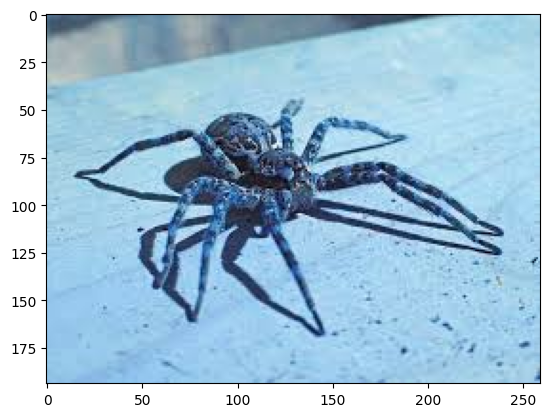

In [4]:
from matplotlib import pyplot as plt # подключим библиотеку
plt.imshow(frame) # отображение в памяти
plt.show() # отображение на экране

Но что это, цвета исказились!

Дело в том, что команда `cv2.imread` OpenCV  читает изображение не в RGB формате (красный-зеленый-синий) а в BGR (синий-зеленый-красный).

Вот она, несогласованность разных библиотек, ведь они пишутся разными людьми. Для работы с `pyplot` нужен RGB, а Opencv работает в BGR. Придется принять этот факт, и при необходимости конвертировать изображения из одного формата в другой. Для этого в OpenCV есть команда `cv2.cvtColor()` которая переведет изображение в нужный цветовой формат, опция `cv2.COLOR_BGR2RGB` для нашего случая.


Теперь все отображается правильно!

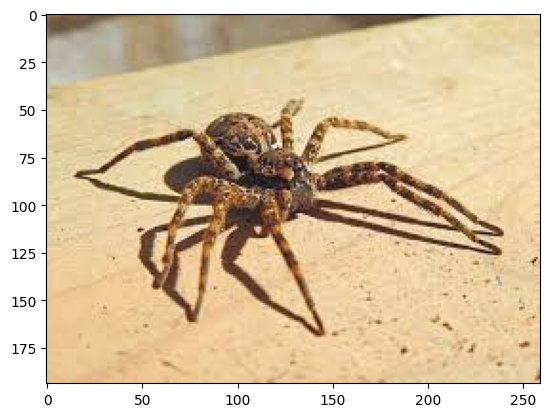

In [5]:
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB) # конвертируем цвета
plt.imshow(frame) #
plt.show() #

### Изменение размеров resize
Изменение размеров изображения командой `cv2.resize()`, указываем ей изображение, новые размеры и способ масштабирования. Например, хотим на 80% уменьшить размер по каждой оси (т.е. оставить 20%). Новые размеры надо указывать в виде (ширина, высота), но при этом размер массива, описывающего изображение это (высота (строки), ширина (столбцы), число цветов), запомните и не путайтесь!

Аргумент `interpolation` - способ масштабирования, может принимать следующие значения:

Значение | Описание
:--- | :---
INTER_NEAREST   | интерполяция по ближайшим соседям
INTER_LINEAR    | билинейная интерполяция (по умолчанию)
INTER_AREA      | интерполяция с учетом площади пикселя. Лучше подходит для уменьшения изображения, при увеличении это очень похоже на INTER_NEAREST.
INTER_CUBIC     | бикубическая интерполяция для окна 4x4
INTER_LANCZOS4  | интерполяция Lanczos для окна 8x8

Попробуйте разные способы, разные масштабы, посмотрите, что, на ваш взгляд, лучше.

(194, 259, 3)
(38, 51, 3)


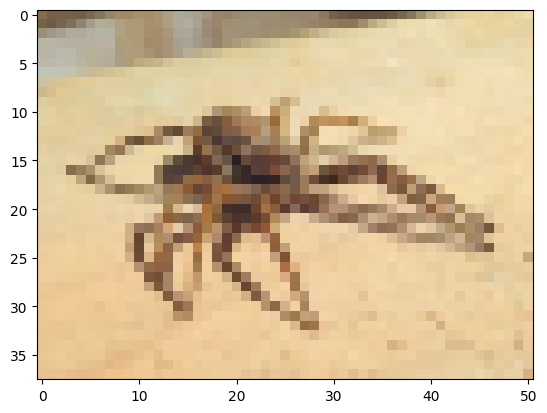

In [6]:
scale_percent = 20 # Процент от изначального размера
print(frame.shape) # Старые размеры
height = int(frame.shape[0] * scale_percent / 100)# новая высота (это первое измерение, индекс 0)
width = int(frame.shape[1] * scale_percent / 100)# новая ширина (это второе измерение, индекс 1)
dim = (width, height)# новые размеры, сначала ширина, потом высота
resized = cv2.resize(frame, dim, interpolation = cv2.INTER_AREA)# изменяем размеры
#resized = cv2.resize(frame, dim, interpolation = cv2.INTER_LANCZOS4)# изменяем размеры

print(resized.shape)# посмотрим на новые размеры

# отобразим
plt.imshow(resized)# рисуем окно
plt.show()# выводим на экран

### Поворот изображения

Поворот - это вариант более общего преобразования - аффинного. Аффинное преобразование векторов это умножение матрицы преобразования на этот вектор и добавление нового вектора - смещения, может быть записано как умножение на матрицу. Сюда входят переносы, сжатие\растяжение, повороты вокруг разных осей и другие операции. Некоторые из них показаны на рисунке.

![img](https://drive.google.com/uc?id=1bFpQF4jdMBE7Cc8mgR0GHW4mjS04bWzz)

Мы можем интерпретировать пиксели изображения как точки, которые имеют координаты на плоскости, представить эти координаты их векторами и применять к этим векторам аффинные преобразования, а потом обратно координаты точек преобразовать в пиксели.

Нам нет необходимости считать матрицы аффинных преобразований самим, команды OpenCV посчитают.

Для поворотов используем команду `cv2.getRotationMatrix2D(center, angle, scale)` которой указываем координаты точки (center) вокруг которой будем поворачивать изображение (x-по ширине, y - по высоте), угол angle поворота в градусах (по часовой стрелке отрицательные углы, против - положительные) и масштаб scale если он нужен (у нас масштаб равен 1). Получаем матрицу аффинного преобразования. Применяем ее в команде `cv2.warpAffine` которой указываем какое изображение изменяем, матрицу преобразования и размер нового изображения (ширина, высота).

Попробуйте самостоятельно поворачивать изображение на разные углы вокруг разных центров.

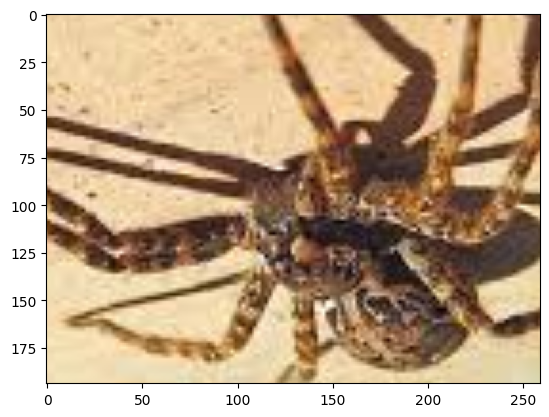

In [7]:
(h, w, c) = frame.shape # узнаем размеры изображения, высота h, ширина w, количество цветов с
center = (w // 2, h // 2) # зададим точку поворота, например центр нашего изображения
M = cv2.getRotationMatrix2D(center, 180, 2.0) # рассчитаем матрицу поворота, повернув вокруг заданного центра на угол 180 градусов, без масштабирования
rotated = cv2.warpAffine(frame, M, (w, h)) # применим рассчитанную матрицу преобразования к изображению и укажем новый размер

# отобразим
plt.imshow(rotated)# рисуем окно
plt.show()# выводим на экран

### Преобразование к  изображению в градациях серого и черно-белое

Уже известная нам команда `cv2.cvtColor()` может преобразовывать цвета, для преобразования в градации серого (8 бит на пиксель, 256 оттенков серого) используем аргумент `cv2.COLOR_BGR2GRAY`. Эта команда изменит размер массива, теперь это будет матрица, без третьего измерения (каналов). pyplot.imshow по умолчанию для серых изображений рисует псевдо-цвета, чтобы увидеть настоящий серый цвет нужно указать атрибут `cmap='gray'`, который устанавливает серую цветовую гамму для отображения. Это влияет только на отображение.

Если мы хотим получить черно-белое изображение, в котором только два цвета черный и белый, надо это изображение преобразовать. Давайте сравним значение каждого пикселя с порогом и если оно больше порога - считаем его белым, если меньше - черным. Для этого используем команду `cv2.threshold()` которой укажем изменяемое изображение, порог, значение которое будем использовать для обозначения белого (максимального) цвета (у нас 255) и способ сравнения (способ `0` означает способ в котором значения меньше порога переводятся в 0, выше порога в максимальный (255) цвет, есть и другие способы, см. документацию). Для правильного отображения черно-белых изображений используем аргумент `cmap='binary'` в команде отображения.

Посмотрим на результаты, серое изображение представляется матрицей, в которой записаны числа 0...255, черно белое изображение здесь представлено матрицей, в которой записаны только два числа или 0 или 255.



[[125 118 110 ... 216 216 215]
 [119 113 105 ... 212 213 213]
 [111 104  96 ... 208 208 208]
 ...
 [186 185 185 ... 148 104  67]
 [180 182 184 ... 152 151 152]
 [180 182 184 ... 192 191 191]]
127.0
[[  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 ...
 [255 255 255 ... 255   0   0]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


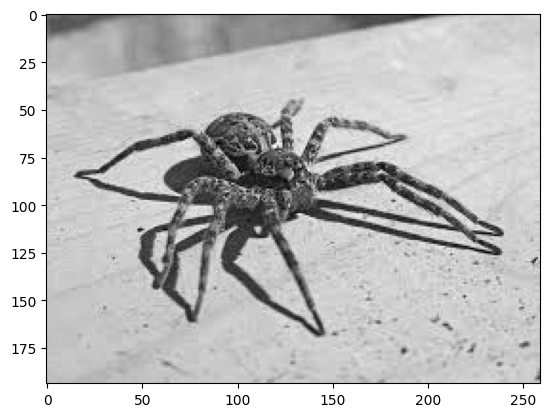

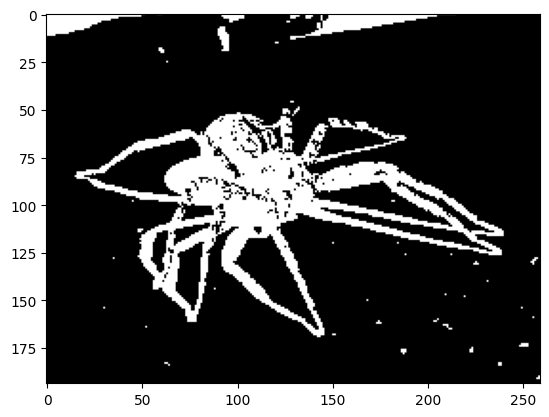

In [8]:
gray_image = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)# конвертируем в серое
print(gray_image)#

ret, threshold_image = cv2.threshold(gray_image, 127, 255, 0)# конвертируем в черно-белое
print(ret)#
print(threshold_image)#
# отобразим

plt.imshow(gray_image,cmap='gray')# рисуем окно
plt.show()# выводим на экран

plt.imshow(threshold_image,cmap='binary')# рисуем окно
plt.show()# выводим на экран

### Размытие / сглаживание

Можно применять разные фильтры к изображению, размытие Гаусса: `cv2.GaussianBlur()`, указываем изображение, размер ядра, стандартное отклонение (не знаем что это? тогда используем то, что есть).

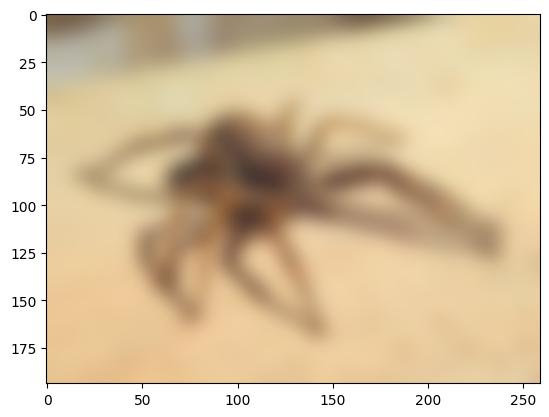

In [9]:
blurred = cv2.GaussianBlur(frame, (31, 31), 0)# размытие

# отобразим
plt.imshow(blurred)# рисуем окно
plt.show()# выводим на экран

### Рисование прямоугольников и линий

`cv2.rectangle()` добавляет прямоугольник в изображение. Указываем изображение, координаты левого верхнего и правого нижнего углов прямоугольника, цвет (в виде тройки чисел RGB), толщину рамки.  

`cv2.line()` добавляет линию в изображение. Указываем изображение, координаты начальной и конечной точки линии, цвет (в виде тройки чисел RGB), толщину.

Эти команды изменяют изображение, поэтому будем пользоваться копией изображения, сделанного с помощью команды `copy()`

(194, 259, 3)


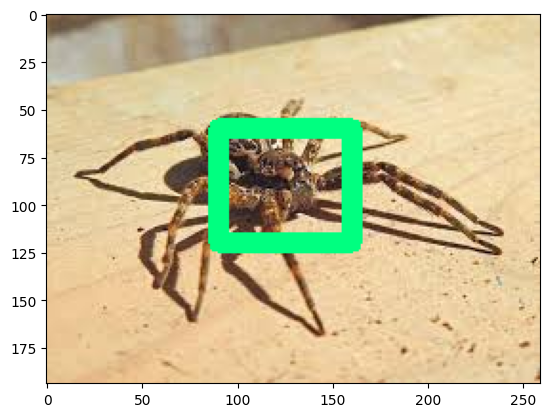

In [10]:
output = frame.copy() # копия изображения
print(output.shape) #
cv2.rectangle(output, (90, 60), (160, 120), (0, 255, 128), 10) # рисуем прямоугольник

plt.imshow(output)# рисуем окно
plt.show()# выводим на экран

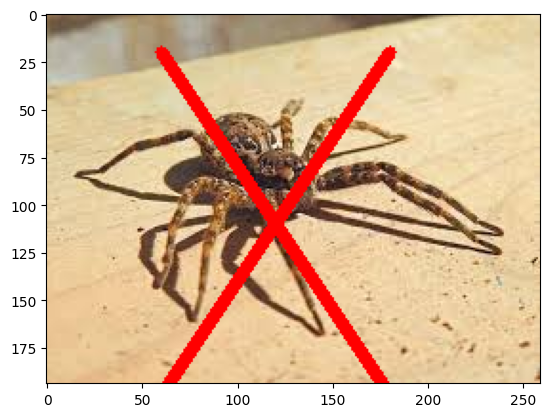

In [11]:
output = frame.copy()
cv2.line(output, (60, 20), (180, 200), (255, 0, 0), 5) # рисуем одну линию
cv2.line(output, (180, 20), (60, 200), (255, 0, 0), 5) # рисуем вторую линию

plt.imshow(output)# рисуем окно
plt.show()# выводим на экран

### Добавление текста
`cv2.putText`  добавляет текст на изображение. Указываем изображение, текст, координаты точки, куда вставляем текст, шрифт, масштаб (можно увеличивать и уменьшать), цвет, толщину линий и др. (русские буквы просто так не понимает).

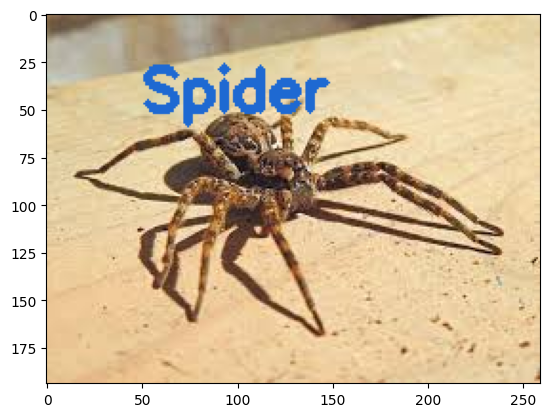

In [12]:
output = frame.copy()
cv2.putText(output, "Spider", (50, 50),cv2.FONT_HERSHEY_SIMPLEX, 1, (30, 105, 210), 3) # добавляем текст

plt.imshow(output)# рисуем окно
plt.show()# выводим на экран

### Сохранение изображения


`cv2.imwrite` сохраняет изображение. Указываем название файла (может включать путь) и изображение. Сохраняемое изображение интерпретируется как в BGR формате, если мы раньше сконвертировали в RGB, то перед сохранением нужно обратно в BGR сконвертировать.

In [13]:
BGR_output=cv2.cvtColor(output, cv2.COLOR_RGB2BGR)# конвертируем цвет
cv2.imwrite("ML_School/saved_img.jpg", BGR_output)# сохраняем

True

# OpenCV. Работа с видео

Чтобы захватить видео с видеокамеры (она должна быть подключена к компьютеру!), вам необходимо создать объект VideoCapture . Его аргументом может быть индекс устройства, или имя видеофайла.

Индекс устройства — это просто номер, указывающий, какая камера по счету подключена к компьютеру. Обычно всего одна камера будет подключена.


---

В Colab захват видеокамеры работать не будет, потому что Colab запускается в виртуальном облаке. Нужен [сложный код](https://colab.research.google.com/notebooks/snippets/advanced_outputs.ipynb#scrollTo=2viqYx97hPMi), чтобы захватить видео с видеокамеры. Поэтому мы будем работать с уже записанным видео. На вашем же личном компьютере можно работать и напрямую с видеокамерой.

In [14]:
import cv2 # подключаем библиотеку
from matplotlib import pyplot as plt
cap = cv2.VideoCapture('ML_School/Котята.mp4') # захват видеопотока
cap

< cv2.VideoCapture 0x791ab87029d0>

cap.read() возвращает логическое True или False. Если кадр считывается, он будет True. Таким образом, вы можете проверить конец видео.

Иногда `cap` может не инициализировать захват. В этом случае происходит ошибка. Вы можете проверить, инициализацию методом cap.isOpened () . Должен вернуть True.

Сам кадр будет хранится в frame.

True
True
(360, 640, 3)


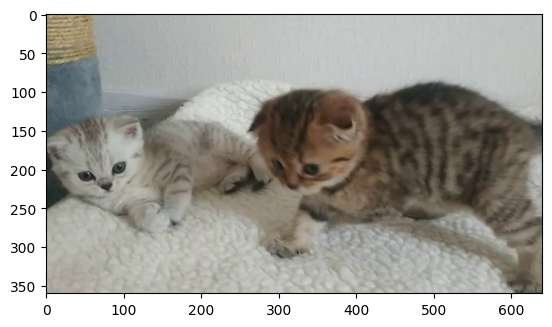

In [15]:
ret, frame = cap.read()# чтение кадра
print(cap.isOpened())# прочтен ли он?
print(ret)
print(frame.shape)
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB) # надо изменить цвета
plt.imshow(frame)# рисуем окно
plt.show()# выводим на экран

После работы с видео надо не забывать удалять все окна и освобождать память - и освобождать камеру.

In [16]:
cap.release() # освобождение видеопотока
cv2.destroyAllWindows() # закрытие окон

Надо не забывать, что за один вызов cap.read() прочитается всего один кадр, а в видео их могут быть сотни. Чтобы последовательно считывать кадры, нужно использовать цикл. Пример кода приведен ниже.

А что делать с каждым отдельным кадром - это уже зависит от цели и задачи. Для простой самостоятельной работы ниже представлена функция меры схожести двух изображений. Используйте ее и цикл, чтобы мерить схожесть двух последовательных кадров (и сделать простую версию optical flow).

Можно написать функцию, которая с помощью готовой меры разницы (воспользуемся функцией из библиотеки [`skimage`](https://scikit-image.org/docs/dev/api/skimage.html) ) высчитывает разницу между двумя изображениями, и применять ее к соседним кадрам. Это может быть интересно для отслеживания динамики изменений.

In [17]:
from skimage.metrics import structural_similarity as ssim # функция для вычисления отличия изображений
def calc_difference(img1, img2): # принимаем два изображения
    (score, diff) = ssim(img1, img2, full=True) # считаем их различие
    diff = (diff * 255).astype("uint8") # преобразуем в uint8, потому что изображения хранятся так
    return diff, score

В общем виде цикл выглядит так:

In [18]:
import cv2 # подключим библиотеку
import matplotlib.pyplot as plt
def testOnVideo(videoPath, max_frames=10): # создадим функцию для работы с кадрами, принимает видеопоток
    cap = cv2.VideoCapture(videoPath) # захват видеопотока
    ret, frame = cap.read() # чтение первого кадра
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) # конвертируем цвет в серый
    old_frame=frame # копия кадра

    for i in range(max_frames): # в  цикле
        ret, frame = cap.read() # читаем кадр
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) # конвертируем в серое
        diff, score = calc_difference(frame, old_frame) # считаем различие текущего и предыдущего кадра
        old_frame=frame # сохраняем кадр
        plt.imshow(diff,cmap='gray')# рисуем окно
        plt.show()
        #cv2.imshow('img',diff) # отображаем
        cv2.waitKey(1000) # ждем 1 сек.

    cap.release()
    cv2.destroyAllWindows() # закрываем окно



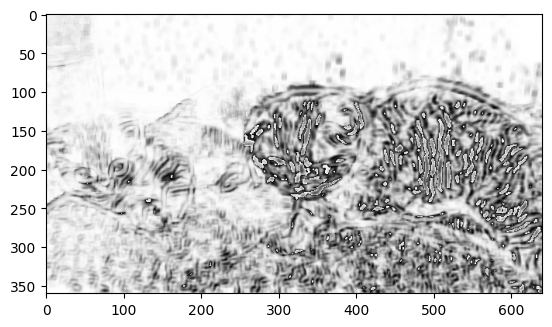

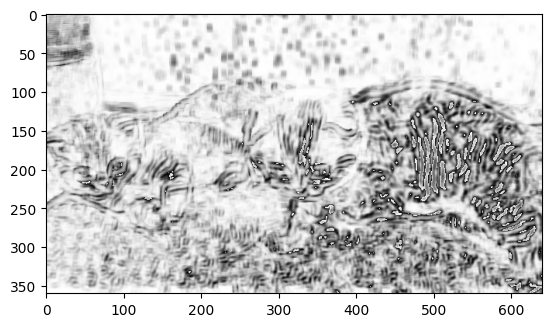

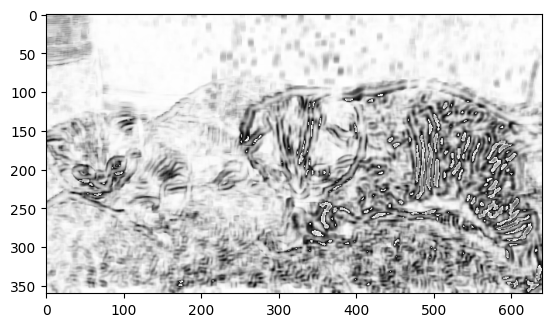

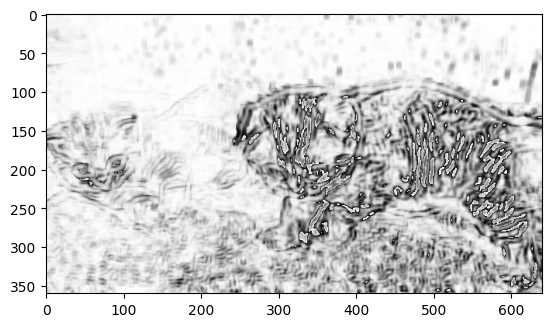

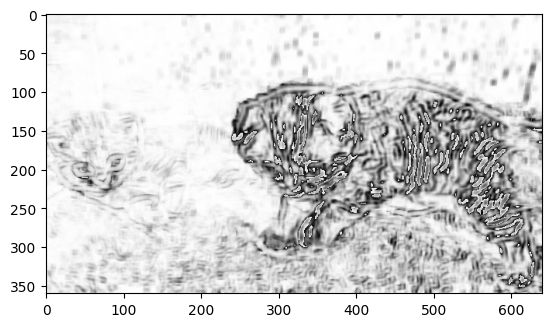

In [19]:
testOnVideo('ML_School/Котята.mp4',5) # запускаем наш пример для файла

In [20]:
cv2.destroyAllWindows()

# Запись видео

VideoWriter() позволяет открыть файл для записи видео покадрово. Указываем кодеки, размер, число кадров в секунду и прочую информацию.

write() записывает кадр.

In [21]:
from tqdm import tqdm
#fps=10
# захват видео-потока
cap = cv2.VideoCapture('ML_School/Котята.mp4')
frame_number=int(cap.get(cv2.CAP_PROP_FRAME_COUNT))  # число кадров
fps = cap.get(cv2.CAP_PROP_FPS) # число кадров в секунду

# проверка захвата
if (cap.isOpened() == False):
  print("Unable to read video")


frame_width = int(cap.get(3)) # ширина кадра
frame_height = int(cap.get(4)) # высота кадра
# открытие потока на запись
out = cv2.VideoWriter('output.avi',cv2.VideoWriter_fourcc('M','J','P','G'), fps, (frame_width,frame_height))

# в цикле читаем файл покадрово, меняем, записываем в выходной видео-поток
for i in tqdm(range(frame_number)):
  ret, frame = cap.read() # читаем кадр

  if ret == True: # если ок
    # что-то делаем с кадром....

    out.write(frame) # записываем в результат

    # отображаем
    #cv2.imshow('frame',frame)

    # ждем
    #if cv2.waitKey(1) & 0xFF == ord('q'):
    #  break

  # Break the loop
  else:
    break

# освобождаем потоки
cap.release()
out.release()

# закрываем все окна
cv2.destroyAllWindows()

100%|██████████| 11383/11383 [00:58<00:00, 195.20it/s]


In [ ]:
# TODO проверить видео, воспроизвести.

# Задание
По аналогии придумайте и сделайте свою обработку соседних кадров (варианты: наложение кадров, переворот кадров, и т.п.)

Пример детекции:
https://www.geeksforgeeks.org/opencv-python-program-face-detection/?ref=gcse

# Ссылки

https://learnopencv.com/read-write-and-display-a-video-using-opencv-cpp-python/